In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [22]:
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import json
import scienceplots

from src.problem import Instance

import os 
os.environ["PATH"] += os.pathsep + '/home/bruno/texlive/2023/bin/x86_64-linux/'

plt.style.use('science')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

instances_dir = Path('../data/raw/')
results_dir = Path('../data/results/')
opts_dir = Path('../data/interim')

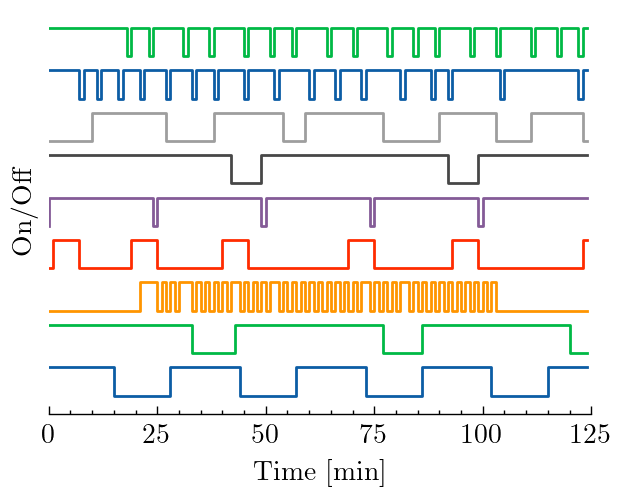

In [26]:
instance_fpath = next(instances_dir.glob('125_9_*.json'))
instance = Instance.from_file(instance_fpath)

opt_fp = opts_dir/(instance_fpath.name.replace('.json', '_opt.npz'))
obj, gap, runtime, X = np.load(opt_fp).values()

x = X[instance.vars_names.find('x(') >= 0]
x = x.reshape((instance.jobs, instance.T))

for i, j in enumerate(x):
    plt.step(np.arange(instance.T), j + i*1.5, label=i)

plt.xlim(0,instance.T)
plt.ylabel('On/Off')
plt.xlabel('Time [min]')

ax = plt.gca()
ax.set_yticks([])
ax.set_xticks(np.linspace(0,125,6), )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# plt.gcf().set_size_inches((6,6))

plt.tick_params(top=False, which='both')
plt.savefig('../schedule_example.pdf')
plt.show()

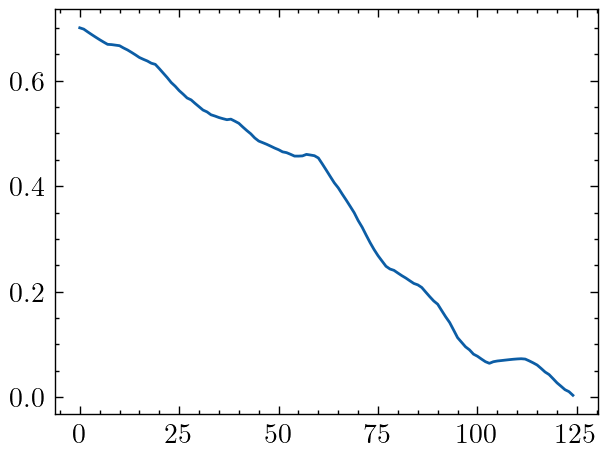

In [27]:
plt.plot(instance.get_soc_from_solution(X))